In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import cartopy.crs as ccrs
import zarr  # to read in Zarr format
import gcsfs # to read google cloud data
import momlevel as ml
import cftime
import cmocean

In [2]:
gcs = gcsfs.GCSFileSystem(token='anon')

In [3]:
google_cloud_cmip6 = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')

In [4]:
SSP1_26_o2=google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Omon' & \
    variable_id == 'o2' & \
    experiment_id == 'ssp126' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr' & \
    member_id == 'r1i1p1f1'"
)
SSP1_26_o2

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
15681,ScenarioMIP,NOAA-GFDL,GFDL-ESM4,ssp126,r1i1p1f1,Omon,o2,gr,gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-ES...,NaN,20180701


In [5]:
SSP1_26_o2sat=google_cloud_cmip6.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Omon' & \
    variable_id == 'o2sat' & \
    experiment_id == 'ssp126' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr' & \
    member_id == 'r1i1p1f1'"
)
SSP1_26_o2sat

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
15679,ScenarioMIP,NOAA-GFDL,GFDL-ESM4,ssp126,r1i1p1f1,Omon,o2sat,gr,gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-ES...,NaN,20180701


In [6]:
gcs = gcsfs.GCSFileSystem(token='anon')
zstore_SSP1_26_o2sat = SSP1_26_o2sat.zstore.values[-1]
zstore_SSP1_26_o2 = SSP1_26_o2.zstore.values[-1]

In [7]:
# create a mutable-mapping-style interface to the store
mapper_SSP1_26_o2sat = gcs.get_mapper(zstore_SSP1_26_o2sat)
mapper_SSP1_26_o2 = gcs.get_mapper(zstore_SSP1_26_o2)

In [8]:
# open the dataset using xarray and zarr
O2sat_SSP126 = xr.open_zarr(mapper_SSP1_26_o2sat, 
                                consolidated=True,use_cftime=True).o2sat
O2_SSP126 = xr.open_zarr(mapper_SSP1_26_o2, 
                                consolidated=True,use_cftime=True).o2

In [9]:
O2sat_SSP126

<xarray.DataArray 'o2sat' (time: 1032, lev: 35, lat: 180, lon: 360)>
dask.array<open_dataset-o2sat, shape=(1032, 35, 180, 360), dtype=float32, chunksize=(15, 35, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lev      (lev) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
  * lon      (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * time     (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
Attributes:
    cell_measures:  area: areacello volume: volcello
    cell_methods:   area: mean where sea time: mean
    comment:        Model data on the 1x1 grid includes values in all cells f...
    interp_method:  conserve_order1
    long_name:      Dissolved Oxygen Concentration at Saturation
    original_name:  o2sat
    standard_name:  mole_concentration_of_dissolved_molecular_oxygen_in_sea_w...
    units:          mol m-3

In [10]:
O2sat=O2sat_SSP126.rename({'lat':'latitude','lon':'longitude'})
O2sat

<xarray.DataArray 'o2sat' (time: 1032, lev: 35, latitude: 180, longitude: 360)>
dask.array<open_dataset-o2sat, shape=(1032, 35, 180, 360), dtype=float32, chunksize=(15, 35, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lev        (lev) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
  * longitude  (longitude) float64 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
  * time       (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
Attributes:
    cell_measures:  area: areacello volume: volcello
    cell_methods:   area: mean where sea time: mean
    comment:        Model data on the 1x1 grid includes values in all cells f...
    interp_method:  conserve_order1
    long_name:      Dissolved Oxygen Concentration at Saturation
    original_name:  o2sat
    standard_name:  mole_concentration_of_dissolved_molecular_oxygen_in_sea_w...
    units:          mol m-3

In [11]:
O2_SSP126

<xarray.DataArray 'o2' (time: 1032, lev: 35, lat: 180, lon: 360)>
dask.array<open_dataset-o2, shape=(1032, 35, 180, 360), dtype=float32, chunksize=(13, 35, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lev      (lev) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
  * lon      (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * time     (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
Attributes:
    cell_measures:  area: areacello volume: volcello
    cell_methods:   area: mean where sea time: mean
    comment:        Model data on the 1x1 grid includes values in all cells f...
    interp_method:  conserve_order1
    long_name:      Dissolved Oxygen Concentration
    original_name:  o2
    standard_name:  mole_concentration_of_dissolved_molecular_oxygen_in_sea_w...
    units:          mol m-3

In [12]:
O2=O2_SSP126.rename({'lat':'latitude','lon':'longitude'})
O2

<xarray.DataArray 'o2' (time: 1032, lev: 35, latitude: 180, longitude: 360)>
dask.array<open_dataset-o2, shape=(1032, 35, 180, 360), dtype=float32, chunksize=(13, 35, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lev        (lev) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
  * longitude  (longitude) float64 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
  * time       (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
Attributes:
    cell_measures:  area: areacello volume: volcello
    cell_methods:   area: mean where sea time: mean
    comment:        Model data on the 1x1 grid includes values in all cells f...
    interp_method:  conserve_order1
    long_name:      Dissolved Oxygen Concentration
    original_name:  o2
    standard_name:  mole_concentration_of_dissolved_molecular_oxygen_in_sea_w...
    units:          mol m-3

In [13]:
SSP126_AOU=O2_SSP126-O2sat_SSP126
SSP126_AOU

<xarray.DataArray (time: 1032, lev: 35, lat: 180, lon: 360)>
dask.array<sub, shape=(1032, 35, 180, 360), dtype=float32, chunksize=(13, 35, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lev      (lev) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
  * lon      (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * time     (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00

In [14]:
AOU=SSP126_AOU.rename({'lat':'latitude','lon':'longitude'})
AOU

<xarray.DataArray (time: 1032, lev: 35, latitude: 180, longitude: 360)>
dask.array<sub, shape=(1032, 35, 180, 360), dtype=float32, chunksize=(13, 35, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lev        (lev) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
  * longitude  (longitude) float64 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
  * time       (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00

In [15]:
#importing basin masks
esm4_basins = xr.open_dataset('../data/basins/esm4_basins_gr.nc').basins

Text(0.5, 1.0, 'Ocean Basin Mask')

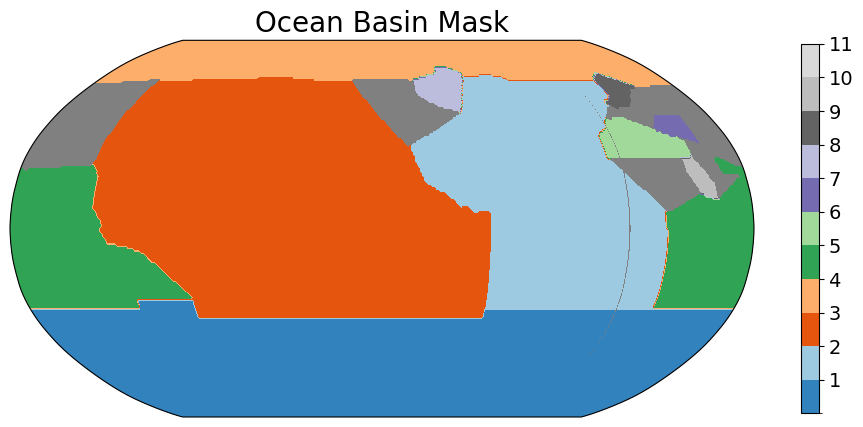

In [16]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-120),facecolor='grey')

plt.figure(figsize=[12,8])

p = esm4_basins.plot.contourf(x='longitude',y='latitude',
                         cmap='tab20c',
                         vmin=0,vmax=11,levels=12,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(p, ticks=[1,2,3,4,5,6,7,8,9,10,11], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("Ocean Basin Mask",fontsize=20)

In [17]:
southernocean = (esm4_basins.where(esm4_basins==1) / esm4_basins.where(esm4_basins==1))
atlanticocean = (esm4_basins.where(esm4_basins==2) / esm4_basins.where(esm4_basins==2))
pacificocean = (esm4_basins.where(esm4_basins==3) / esm4_basins.where(esm4_basins==3))
arcticocean = (esm4_basins.where(esm4_basins==4) / esm4_basins.where(esm4_basins==4))
indianocean = (esm4_basins.where(esm4_basins==5) / esm4_basins.where(esm4_basins==5))

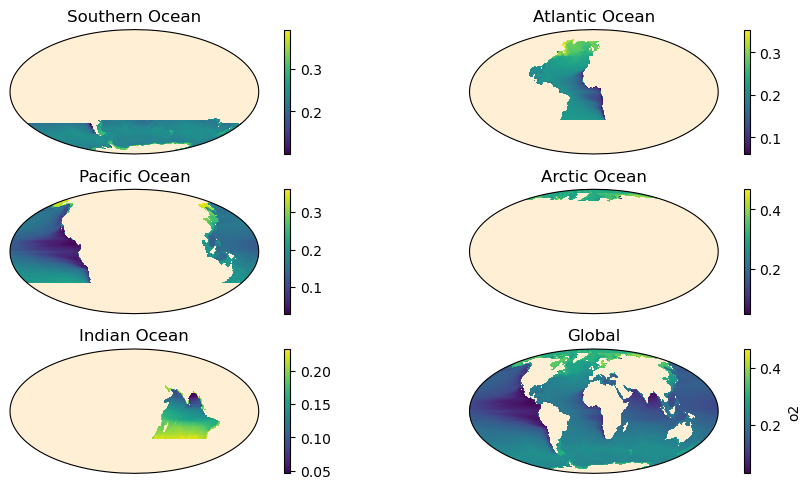

In [35]:
subplot_kws=dict(projection=ccrs.Mollweide(),
                 facecolor='papayawhip')

fig, (ax)=plt.subplots(ncols=2,nrows=3, figsize=(10,5),subplot_kw=subplot_kws)
(O2*southernocean).mean(dim='lev').mean(dim='time').plot(ax=ax[0,0],
                              transform=ccrs.PlateCarree())
(O2*atlanticocean).mean(dim='lev').mean(dim='time').plot(ax=ax[0,1],
                                transform=ccrs.PlateCarree())
(O2*pacificocean).mean(dim='lev').mean(dim='time').plot(ax=ax[1,0],
                              transform=ccrs.PlateCarree())
(O2*arcticocean).mean(dim='lev').mean(dim='time').plot(ax=ax[1,1],
                              transform=ccrs.PlateCarree())
(O2*indianocean).mean(dim='lev').mean(dim='time').plot(ax=ax[2,0],
                              transform=ccrs.PlateCarree())
O2.mean(dim='lev').mean(dim='time').plot(ax=ax[2,1],
                              transform=ccrs.PlateCarree())

ax[0,0].set_title('Southern Ocean')
ax[0,1].set_title('Atlantic Ocean')
ax[1,0].set_title('Pacific Ocean')
ax[1,1].set_title('Arctic Ocean')
ax[2,0].set_title('Indian Ocean')
ax[2,1].set_title('Global')

plt.tight_layout()

In [36]:
#look into seasonal o2 sat?